In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import os
import glob
import datetime
import process 
from KRCC import *

In [2]:
path = "Processed Datasets/"
healthorg_df = pd.read_excel(path + "healthorg.xlsx", index_col=0)
leftnews_df = pd.read_excel(path + "leftnews.xlsx", index_col=0)
rightnews_df = pd.read_excel(path + "rightnews.xlsx", index_col=0)
rightind_df = pd.read_excel(path + "rightind.xlsx", index_col=0)
leftind_df = pd.read_excel(path + "leftind.xlsx", index_col=0)
celeb_df = pd.read_excel(path + "celebrities.xlsx", index_col=0)
fake_df = pd.read_excel(path + "fake.xlsx", index_col=0)
real_df = pd.read_excel(path + "real.xlsx", index_col=0)

In [3]:
healthorg_df = healthorg_df[healthorg_df["date"] <= pd.to_datetime('2020-04-30')]
healthorg_df = healthorg_df[healthorg_df["date"] >= pd.to_datetime('2020-03-01')]
leftnews_df = leftnews_df[leftnews_df["date"] <= pd.to_datetime('2020-04-30')]
leftnews_df = leftnews_df[leftnews_df["date"] >= pd.to_datetime('2020-03-01')]
rightnews_df = rightnews_df[rightnews_df["date"] <= pd.to_datetime('2020-04-30')]
rightnews_df = rightnews_df[rightnews_df["date"] >= pd.to_datetime('2020-03-01')]
rightind_df = rightind_df[rightind_df["date"] <= pd.to_datetime('2020-04-30')]
rightind_df = rightind_df[rightind_df["date"] >= pd.to_datetime('2020-03-01')]
leftind_df = leftind_df[leftind_df["date"] <= pd.to_datetime('2020-04-30')]
leftind_df = leftind_df[leftind_df["date"] >= pd.to_datetime('2020-03-01')]
celeb_df = celeb_df[celeb_df["date"] <= pd.to_datetime('2020-04-30')]
celeb_df = celeb_df[celeb_df["date"] >= pd.to_datetime('2020-03-01')]
fake_df = fake_df[fake_df["date"] <= pd.to_datetime('2020-04-30')]
fake_df = fake_df[fake_df["date"] >= pd.to_datetime('2020-03-01')]
real_df = real_df[real_df["date"] <= pd.to_datetime('2020-04-30')]
real_df = real_df[real_df["date"] >= pd.to_datetime('2020-03-01')]


In [4]:
# make timelines for each group
# health
health_likes = healthorg_df.groupby('date')["likes_count"].sum()
health_retweets = healthorg_df.groupby('date')["retweets_count"].sum()
# right
rightind_likes = rightind_df.groupby('date')["likes_count"].sum()
rightind_retweets = rightind_df.groupby('date')["retweets_count"].sum()
# left
leftind_likes = leftind_df.groupby('date')["likes_count"].sum()
leftind_retweets = leftind_df.groupby('date')["retweets_count"].sum()
# celeb
celeb_likes = celeb_df.groupby('date')["likes_count"].sum()
celeb_retweets = celeb_df.groupby('date')["retweets_count"].sum()
# left news
leftnews_likes = leftnews_df.groupby('date')["likes_count"].sum()
leftnews_retweets = leftnews_df.groupby('date')["retweets_count"].sum()
# right news
rightnews_likes = rightnews_df.groupby('date')["likes_count"].sum()
rightnews_retweets = rightnews_df.groupby('date')["retweets_count"].sum()
# real
real_likes = real_df.groupby('date')["favorite_count"].sum()
real_retweets = real_df.groupby('date')["retweet_count"].sum()
# fake
fake_likes = fake_df.groupby('date')["favorite_count"].sum()
fake_retweets = fake_df.groupby('date')["retweet_count"].sum()



In [5]:
healthorg_df["date"] = pd.to_datetime(healthorg_df["date"])
rightind_df["date"] = pd.to_datetime(rightind_df["date"])
leftind_df["date"] = pd.to_datetime(leftind_df["date"])
rightnews_df["date"] = pd.to_datetime(rightnews_df["date"])
leftnews_df["date"] = pd.to_datetime(leftnews_df["date"])
celeb_df["date"] = pd.to_datetime(celeb_df["date"])
real_df["date"] = pd.to_datetime(real_df["date"])
fake_df["date"] = pd.to_datetime(fake_df["date"])

healthorg_dates = healthorg_df.sort_values("date", ascending=True)["date"].value_counts()
rightind_dates = rightind_df.sort_values("date", ascending=True)["date"].value_counts()
leftind_dates = leftind_df.sort_values("date", ascending=True)["date"].value_counts()
celeb_dates = celeb_df.sort_values("date", ascending=True)["date"].value_counts()
rightnews_dates = rightnews_df.sort_values("date", ascending=True)["date"].value_counts()
leftnews_dates = leftnews_df.sort_values("date", ascending=True)["date"].value_counts()
fake_dates = fake_df.sort_values("date", ascending=True)["date"].value_counts()
real_dates = real_df.sort_values("date", ascending=True)["date"].value_counts()

In [6]:
bins = '3D'
health_rt_bin = (health_retweets/healthorg_dates).resample(bins).sum()
rightind_rt_bin = (rightind_retweets/rightind_dates).resample(bins).sum()
leftind_rt_bin = (leftind_retweets/leftind_dates).resample(bins).sum()
rightnews_rt_bin = (rightnews_retweets/rightnews_dates).resample(bins).sum()
leftnews_rt_bin = (leftnews_retweets/leftnews_dates).resample(bins).sum()
celeb_rt_bin = (celeb_retweets/celeb_dates).resample(bins).sum()
real_rt_bin = (real_retweets/real_dates).resample(bins).sum()
fake_rt_bin = (fake_retweets/fake_dates).resample(bins).sum()

Text(0.5, 1.0, 'Average Fake Retweets')

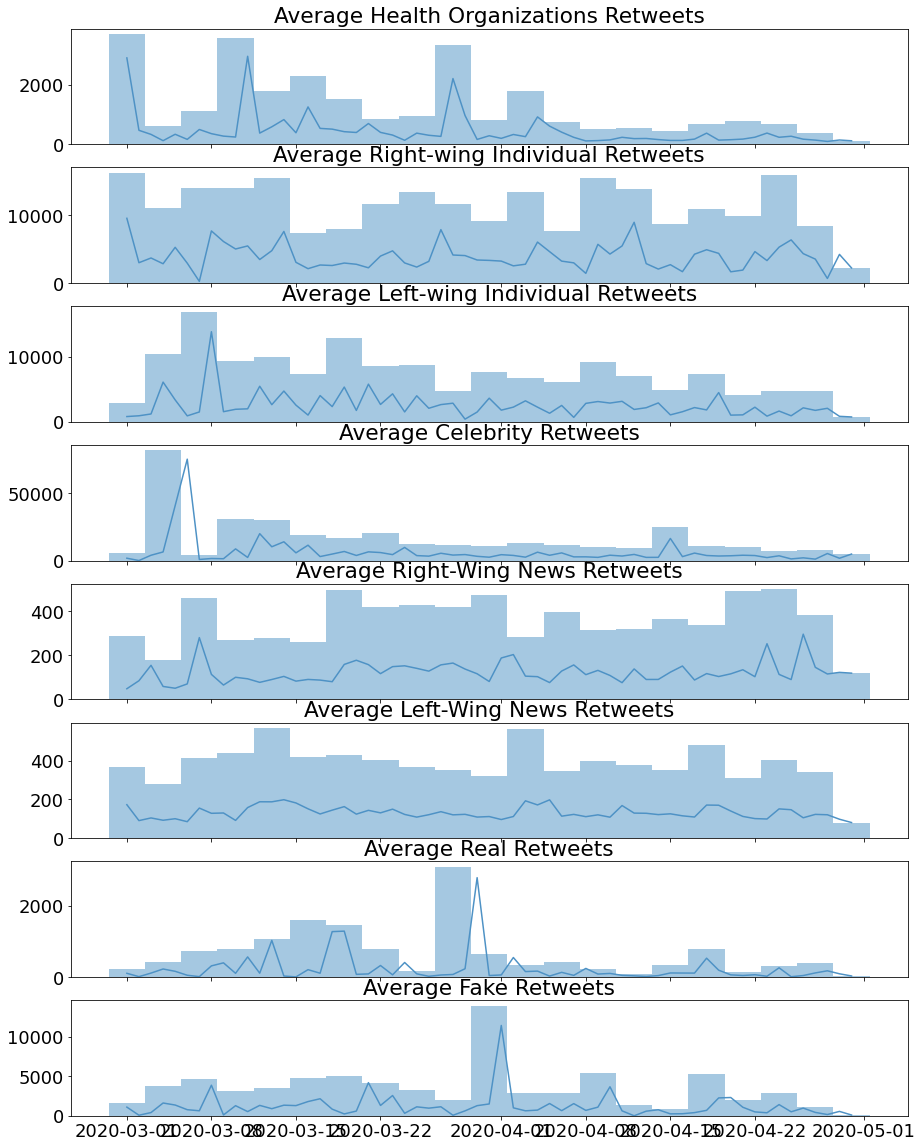

In [7]:
# plot avergae retweets
plt.rcParams.update({'font.size': 18})
fig, axes = plt.subplots(8, 1, figsize=[15, 20], sharex=True)
axes[0].plot(health_retweets/healthorg_dates, color = '#4E92C5')
axes[0].bar(health_rt_bin.index.sort_values(), health_rt_bin, width=3, color = '#A5C8E1')
axes[0].set_title("Average Health Organizations Retweets")

axes[1].plot(rightind_retweets/rightind_dates, color = '#4E92C5')
axes[1].bar(rightind_rt_bin.index.sort_values(), rightind_rt_bin, width=3, color = '#A5C8E1')
axes[1].set_title("Average Right-wing Individual Retweets")

axes[2].plot(leftind_retweets/leftind_dates, color = '#4E92C5')
axes[2].bar(leftind_rt_bin.index.sort_values(), leftind_rt_bin, width=3, color = '#A5C8E1')
axes[2].set_title("Average Left-wing Individual Retweets")

axes[3].plot(celeb_retweets/celeb_dates, color = '#4E92C5')
axes[3].bar(celeb_rt_bin.index.sort_values(), celeb_rt_bin, width=3, color = '#A5C8E1')
axes[3].set_title("Average Celebrity Retweets")

axes[4].plot(rightnews_retweets/rightnews_dates, color = '#4E92C5')
axes[4].bar(rightnews_rt_bin.index.sort_values(), rightnews_rt_bin, width=3, color = '#A5C8E1')
axes[4].set_title("Average Right-Wing News Retweets")

axes[5].plot(leftnews_retweets/leftnews_dates, color = '#4E92C5')
axes[5].bar(leftnews_rt_bin.index.sort_values(), leftnews_rt_bin, width=3, color = '#A5C8E1')
axes[5].set_title("Average Left-Wing News Retweets")

axes[6].plot(real_retweets/real_dates, color = '#4E92C5')
axes[6].bar(real_rt_bin.index.sort_values(), real_rt_bin, width=3, color = '#A5C8E1')
axes[6].set_title("Average Real Retweets")

axes[7].plot(fake_retweets/fake_dates, color = '#4E92C5')
axes[7].bar(fake_rt_bin.index.sort_values(), fake_rt_bin, width=3, color = '#A5C8E1')
axes[7].set_title("Average Fake Retweets")

In [8]:
# bin likes
health_like_bin = (health_likes/healthorg_dates).resample('3D').sum()
rightind_like_bin = (rightind_likes/rightind_dates).resample('3D').sum()
leftind_like_bin = (leftind_likes/leftind_dates).resample('3D').sum()
rightnews_like_bin = (rightnews_likes/rightnews_dates).resample('3D').sum()
leftnews_like_bin = (leftnews_likes/leftnews_dates).resample('3D').sum()
celeb_like_bin = (celeb_likes/celeb_dates).resample('3D').sum()
real_like_bin = (real_likes/real_dates).resample('3D').sum()
fake_like_bin = (fake_likes/fake_dates).resample('3D').sum()

Text(0.5, 1.0, 'Average Fake Likes')

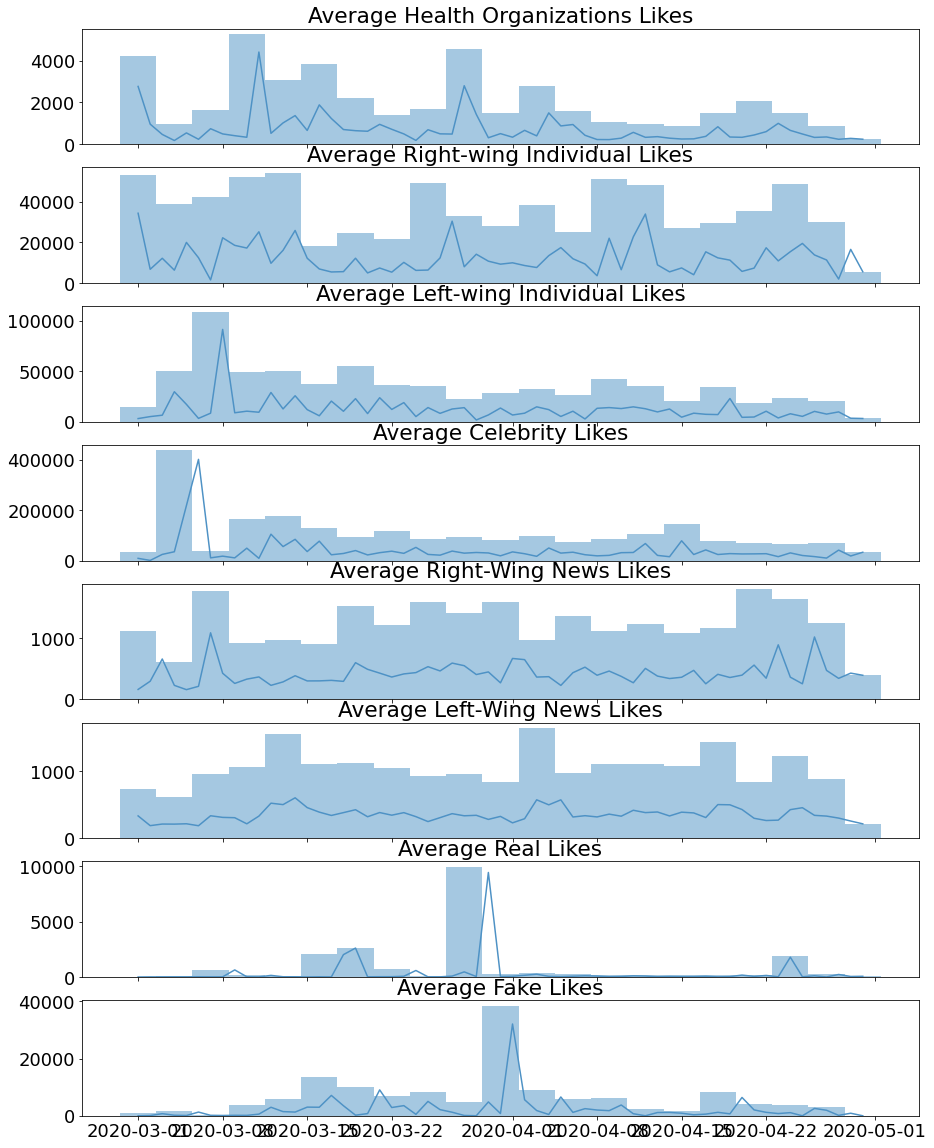

In [9]:
# plot likes divided by number of tweets
# plot
fig, axes = plt.subplots(8, 1, figsize=[15, 20], sharex=True)
axes[0].plot(health_likes/healthorg_dates, color = '#4E92C5')
axes[0].bar((health_like_bin).index.sort_values(), health_like_bin, width=3, color = '#A5C8E1')
axes[0].set_title("Average Health Organizations Likes")

axes[1].plot(rightind_likes/rightind_dates, color = '#4E92C5')
axes[1].bar(rightind_like_bin.index.sort_values(), rightind_like_bin, width=3, color = '#A5C8E1')
axes[1].set_title("Average Right-wing Individual Likes")

axes[2].plot(leftind_likes/leftind_dates, color = '#4E92C5')
axes[2].bar(leftind_like_bin.index.sort_values(), leftind_like_bin, width=3, color = '#A5C8E1')
axes[2].set_title("Average Left-wing Individual Likes")

axes[3].plot(celeb_likes/celeb_dates, color = '#4E92C5')
axes[3].bar(celeb_like_bin.index.sort_values(), celeb_like_bin, width=3, color = '#A5C8E1')
axes[3].set_title("Average Celebrity Likes")

axes[4].plot(rightnews_likes/rightnews_dates, color = '#4E92C5')
axes[4].bar(rightnews_like_bin.index.sort_values(), rightnews_like_bin, width=3, color = '#A5C8E1')
axes[4].set_title("Average Right-Wing News Likes")

axes[5].plot(leftnews_likes/leftnews_dates, color = '#4E92C5')
axes[5].bar(leftnews_like_bin.index.sort_values(), leftnews_like_bin, width=3, color = '#A5C8E1')
axes[5].set_title("Average Left-Wing News Likes")

axes[6].plot(real_likes/real_dates, color = '#4E92C5')
axes[6].bar(real_like_bin.index.sort_values(), real_like_bin, width=3, color = '#A5C8E1')
axes[6].set_title("Average Real Likes")

axes[7].plot(fake_likes/fake_dates, color = '#4E92C5')
axes[7].bar(fake_like_bin.index.sort_values(), fake_like_bin, width=3, color = '#A5C8E1')
axes[7].set_title("Average Fake Likes")

In [10]:
print("HealthOrg Tweets: \t{}\nLeft Tweets: \t{}\nRight Tweets: \t{}\nCeleb Tweets: \t{}\nLeft News Outlet Tweets: \t{}\nRight News Outlet Tweets:\t{}\nFake Tweets:\t\t{}\nReal Tweets:\t\t{}\n".format(len(health_rt_bin), len(leftind_rt_bin), len(rightind_rt_bin), len(celeb_rt_bin), len(leftnews_rt_bin), len(rightnews_rt_bin), len(fake_rt_bin), len(real_rt_bin)))

HealthOrg Tweets: 	21
Left Tweets: 	21
Right Tweets: 	21
Celeb Tweets: 	21
Left News Outlet Tweets: 	21
Right News Outlet Tweets:	21
Fake Tweets:		21
Real Tweets:		21



In [11]:
print("HealthOrg Tweets: \t{}\nLeft Tweets: \t{}\nRight Tweets: \t{}\nCeleb Tweets: \t{}\nRight News Outlet Tweets: \t{}\nLeft News Outlet Tweets:\t{}\nFake Tweets:\t\t{}\nReal Tweets:\t\t{}\n".format(len(health_like_bin), len(leftind_like_bin), len(rightind_like_bin), len(celeb_like_bin), len(rightnews_like_bin), len(leftnews_like_bin), len(fake_like_bin), len(real_like_bin)))


HealthOrg Tweets: 	21
Left Tweets: 	21
Right Tweets: 	21
Celeb Tweets: 	21
Right News Outlet Tweets: 	21
Left News Outlet Tweets:	21
Fake Tweets:		21
Real Tweets:		21



In [12]:
print('retweet/frequency')

print("real and health")
krcc_test(real_rt_bin, health_rt_bin)
print("real and left")
krcc_test(real_rt_bin, leftind_rt_bin)
print("real and right")
krcc_test(real_rt_bin, rightind_rt_bin)
print("real and celeb")
krcc_test((real_rt_bin), celeb_rt_bin)
print("real and right news")
krcc_test(real_rt_bin, rightnews_rt_bin)
print("real and left news")
krcc_test(real_rt_bin, leftnews_rt_bin)

print("\nfake and health")
krcc_test(fake_rt_bin, health_rt_bin)
print("fake and left")
krcc_test(fake_rt_bin, leftind_rt_bin)
print("fake and right")
krcc_test(fake_rt_bin, rightind_rt_bin)
print("fake and celeb")
krcc_test(fake_rt_bin, celeb_rt_bin)
print("fake and right news")
krcc_test(fake_rt_bin, rightnews_rt_bin)
print("fake and left news")
krcc_test(fake_rt_bin, leftnews_rt_bin)

retweet/frequency
real and health
KRCC = 0.40952380952380957
p value = 0.009020134749794136
real and left
KRCC = 0.37142857142857144
p value = 0.018676036751262722
real and right
KRCC = -0.10476190476190478
p value = 0.5306221632230573
real and celeb
KRCC = 0.3523809523809524
p value = 0.026152256353173968
real and right news
KRCC = 0.0380952380952381
p value = 0.8346819234227341
real and left news
KRCC = 0.3238095238095238
p value = 0.04196934455920998

fake and health
KRCC = 0.1619047619047619
p value = 0.3232088737909401
fake and left
KRCC = 0.5428571428571428
p value = 0.00036306517605338095
fake and right
KRCC = 0.06666666666666667
p value = 0.6981882790943121
fake and celeb
KRCC = 0.18095238095238098
p value = 0.2674910846901993
fake and right news
KRCC = 0.09523809523809525
p value = 0.5706054991361066
fake and left news
KRCC = 0.3238095238095238
p value = 0.04196934455920998


In [13]:
print("like/frequency")

print("real and health")
krcc_test(real_like_bin, health_like_bin)
print("real and left")
krcc_test(real_like_bin, leftind_like_bin)
print("real and right")
krcc_test(real_like_bin, rightind_like_bin)
print("real and celeb")
krcc_test(real_like_bin, celeb_like_bin)
print("real and right news")
krcc_test(real_like_bin, rightnews_like_bin)
print("real and left news")
krcc_test(real_like_bin, leftnews_like_bin)

print("\nfake and health")
krcc_test(fake_like_bin, health_like_bin)
print("fake and left")
krcc_test(fake_like_bin, leftind_like_bin)
print("fake and right")
krcc_test(fake_like_bin, rightind_like_bin)
print("fake and celeb")
krcc_test(fake_like_bin, celeb_like_bin)
print("fake and right news")
krcc_test(fake_like_bin, rightnews_like_bin)
print("fake and left news")
krcc_test(fake_like_bin, leftnews_like_bin)

like/frequency
real and health
KRCC = 0.17142857142857143
p value = 0.2944906590580466
real and left
KRCC = 0.08571428571428572
p value = 0.6119326072720337
real and right
KRCC = -0.3047619047619048
p value = 0.05636408981183753
real and celeb
KRCC = -0.08571428571428572
p value = 0.6119326072720337
real and right news
KRCC = 0.2857142857142857
p value = 0.07451845434691835
real and left news
KRCC = 0.24761904761904766
p value = 0.12453202701123642

fake and health
KRCC = 0.26666666666666666
p value = 0.09703982596968545
fake and left
KRCC = 0.21904761904761907
p value = 0.17632511106950258
fake and right
KRCC = -0.17142857142857143
p value = 0.2944906590580466
fake and celeb
KRCC = 0.21904761904761907
p value = 0.17632511106950258
fake and right news
KRCC = 0.09523809523809525
p value = 0.5706054991361066
fake and left news
KRCC = 0.34285714285714286
p value = 0.03074704290123868
